<a href="https://colab.research.google.com/github/sapto-nugroho/PCD/blob/main/PCD_Assignment02/PCD_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##
Implementing following program from scratch

1. Convolution Function

2. Spatial Filtering with several kernel and discuss in which image case the kernel is suitable for

3. Sharpening with blurring operation

4. Make discussion in the end of COLAB, in which case the filtering should be used instead of pixel-based method.

Create your notebook with name as "PCD_Assignment02" and upload to GitHub. You need to provide your GitHub's code link to the text editor in submission form.

In [1]:
!ls
!git clone https://github.com/sapto-nugroho/PCD.git
!ls

sample_data
Cloning into 'PCD'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 282 (delta 20), reused 5 (delta 2), pack-reused 200 (from 1)
Receiving objects: 100% (282/282), 9.72 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (89/89), done.
PCD  sample_data


In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import statistics as st
import pdb
import copy

##Image

In [42]:
def Acquire(src,size):
  #Image and Copy
  img = plt.imread(src)
  img_copy = copy.deepcopy(img)

  #Plot Image dan Copy
  fig, axs = plt.subplots(1, 2, figsize=(size, size))
  axs[0].imshow(img)
  axs[0].set_title(f"Original, shape, {img.shape}")
  axs[1].imshow(img_copy)
  axs[1].set_title(f"Copy, shape {img_copy.shape}")
  plt.tight_layout()
  plt.show()

  return img, img_copy

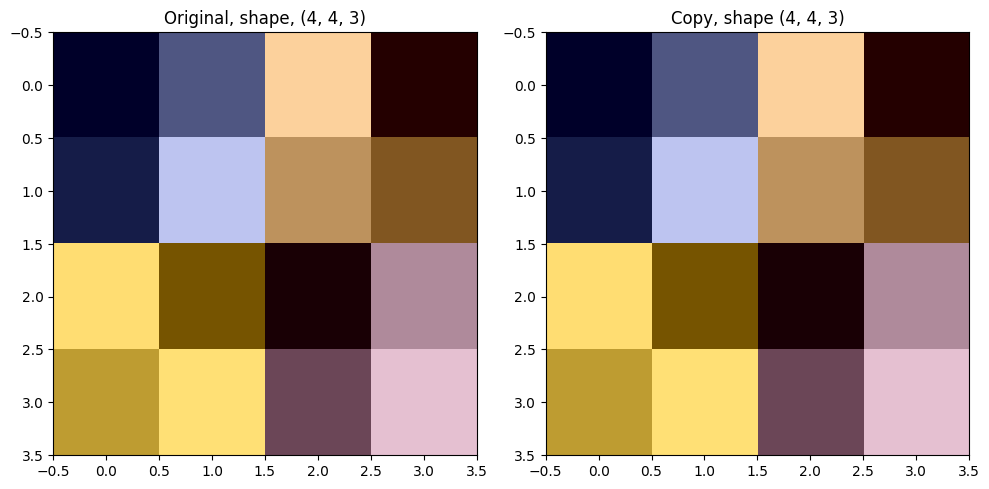

In [75]:
# img_path = '/content/PCD/PCD_Assignment01/grid.jpg'
# img_path = '/content/PCD/PCD_Assignment01/grid01.jpg'
# img_path = '/content/PCD/PCD_Assignment01/grid02.jpg'
# img_path = '/content/PCD/PCD_Assignment01/4x4.jpg'
# img_path = '/content/PCD/PCD_Assignment01/4x4color.jpg'
# img_path = '/content/PCD/PCD_Assignment01/8x8color.jpg'
# img_path = '/content/PCD/PCD_Assignment01/8x8white.jpg'
# img_path = '/content/PCD/PCD_Assignment01/16x16.jpg'
# img_path = '/content/PCD/PCD_Assignment01/64x64.jpg'
# img_path = '/content/PCD/PCD_Assignment01/128x128.jpg'
# img_path = '/content/PCD/PCD_Assignment01/color01.jpg'
# img_path = '/content/PCD/PCD_Assignment01/color02.jpg'
# img_path = '/content/PCD/PCD_Assignment01/clouds.jpg'
# img_path = '/content/PCD/PCD_Assignment01/mountain.jpg'

img_path = '/content/PCD/PCD_Assignment02/4x4colour.jpg'
# img_path = '/content/PCD/PCD_Assignment02/8x8colour.jpg'
# img_path = '/content/PCD/PCD_Assignment02/female01.png'
# img_path = '/content/PCD/PCD_Assignment02/pattern.png'

img,img_copy = Acquire(img_path,10)
# print(img[0][0],img_copy[-1][-1])

In [76]:
print(img_copy)

[[[  0   0  41]
  [ 79  86 130]
  [252 209 156]
  [ 36   0   0]]

 [[ 21  28  72]
  [189 196 240]
  [189 146  93]
  [129  86  33]]

 [[255 221 114]
  [118  84   0]
  [ 25   0   5]
  [175 138 155]]

 [[190 156  49]
  [255 224 117]
  [107  70  87]
  [229 192 209]]]


In [103]:
# if img_copy.dtype != np.uint8:
#   img_copy = img_copy*255
#   img_copy = img_copy.astype(np.uint8)

img_copy = img_copy.astype(int)

if img_copy.shape[2] == 4:
  b,g,r,a = cv2.split(img_copy)
else:
  b,g,r = cv2.split(img_copy)

bgr = []
bgr.append(b)
bgr.append(g)
bgr.append(r)

bgr_pad = []
for i in range(3):
  # bgr_pad = np.pad(b, pad_width=((1, 1), (1, 1)), mode='constant', constant_values=0)
  bgr_pad.append(np.pad(bgr[i], pad_width=1, mode='constant', constant_values=0))
  # print(bgr_pad)

kernel1 = np.array([[0,0,0],[0,2,0],[0,0,0]])

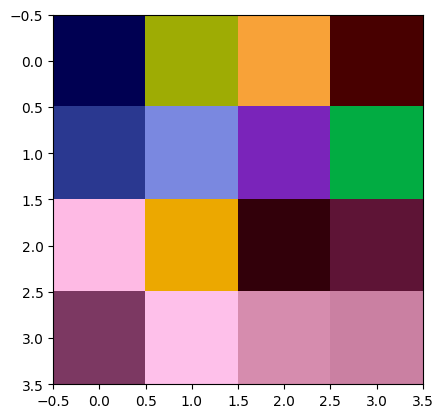

In [104]:
# img_new = np.zeros((3,b.shape[0],b.shape[1])).astype(np.uint8)
img_new = np.zeros((3,b.shape[0],b.shape[1])).astype(int)
# print(img_new.shape)

for h in range(3):
  for i in range(b.shape[0]):
    for j in range(b.shape[1]):
      img_new[h][i][j] = (kernel1[0][0]*bgr_pad[h][i][j]+kernel1[0][1]*bgr_pad[h][i][j+1]+kernel1[0][2]*bgr_pad[h][i][j+2])+(kernel1[1][0]*bgr_pad[h][i+1][j]+kernel1[1][1]*bgr_pad[h][i+1][j+1]+kernel1[1][2]*bgr_pad[h][i+1][j+2])+(kernel1[2][0]*bgr_pad[h][i+2][j]+kernel1[2][1]*bgr_pad[h][i+2][j+1]+kernel1[2][2]*bgr_pad[h][i+2][j+2])

img_co = cv2.merge([img_new[0],img_new[1],img_new[2]])
# img_co = cv2.merge([img_new[2],img_new[1],img_new[0]])
img_co = img_co.astype(np.uint8)

plt.imshow(img_co)
plt.show()